In [ ]:
#车身颜色
colors = data['颜色'].value_counts()
cols_colors = list(colors.keys())
#数值
value_colors = list(colors)
value_colors

explode = ()
#绘画饼图
plt.pie(value_colors,labels = cols_colors,autopct = '%1.1f%%',shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [ ]:
# 簇状图
fig , ax = plt.subplots(1,1, figsize=(16, 8))
# fig.suptitle("原价与售价对比",fontsize=20,x=0.5,y=0.95)  #  总图标题
ax.set_title("汽车原价/万", fontsize=25, color = 'red')  # 子图标题
ax.hist(data['汽车原价/万'],bins = 20)
plt.ylabel("汽车数量", fontsize=20, color = 'blue') #设置X轴Y轴名称 ，字体大小，颜色
plt.xlabel("汽车原价", fontsize=20, color = 'blue') 
plt.ylim(0,6500)  #设置Y轴上下限 
plt.tick_params(labelsize=13)  # 刻度字体大小
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
ax.xaxis.set_major_locator(MultipleLocator(5))  # x轴刻度值之家的差
ax.yaxis.set_major_locator(MultipleLocator(500))  # y轴刻度值之家的差
# 给条形图添加数据标注
# for x, y in enumerate(data['汽车原价/万'].values):
#     plt.text(x-0.4, y+500, "%s" %y)

In [ ]:
# 线性回归
plt.figure(figsize=(16, 8))
plt.scatter(data['驾驶行程/万公里'], data['汽车售价/万'], c='black')
plt.xlabel("驾驶行程/万公里", fontsize= 20, c='blue')
plt.ylabel("汽车售价/万", fontsize= 20, c='blue')
plt.show()

In [ ]:
import statsmodels.api as sm
X = data['驾驶行程/万公里']
y = data['汽车售价/万']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 

In [ ]:
import math  #  ln开方
ln = []
ln_value = data['汽车售价/万']/data['差价']
for i in ln_value:
    ln.append(math.log(float(i)))

In [ ]:
# 建模
from sklearn.linear_model import LinearRegression
X = data['驾驶行程/万公里'].values.reshape(-1,1)
y = data['汽车售价/万'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

In [ ]:
# 拟合直线
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['驾驶行程/万公里'], data['汽车售价/万'], c='black')
plt.plot( data['驾驶行程/万公里'], predictions, c='blue', linewidth=2)
plt.xlabel("驾驶行程/万公里", fontsize= 20, c='blue')
plt.ylabel("汽车售价/万", fontsize= 20, c='blue')
plt.show()

In [ ]:
#  评估模型相关性
#  接下来是检验一个模型表现是否良好，需要查看它的R值和每个系数的p值。
import statsmodels.api as sm
X = data['驾驶行程/万公里']
y = data['汽车售价/万']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 

In [ ]:
# 拟合线性方程
from sklearn.linear_model import LinearRegression
X = data['驾驶行程/万公里'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['售/原'], data['驾驶行程/万公里'], c='black')
plt.plot( data['售/原'], predictions, c='blue', linewidth=2)
plt.xlabel("驾驶行程/万公里", fontsize= 20, c='blue')
plt.ylabel("售/原比值", fontsize= 20, c='blue')
plt.show()

In [55]:
# 作者：Irain
# QQ联系方式：2573396010
# 日期：2020年4月8日

%matplotlib inline
import pandas
import xlrd  #读取Excel文件的包
import xlsxwriter   #将文件写入Excel的包
import os
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
#解决绘图中的中文字体显示问题
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
#seaborn下的直方图
import seaborn as sns
import warnings
import statsmodels.api as sm  # 拟合数据
warnings.filterwarnings('ignore')
data = pandas.read_excel('D:/Information/Working/pycharm/jike/venv/Try/ErShouCheZhiJia/ErSC_Thread/所有汽车清理数据/二手车之家的所有汽车原始数据.xlsx')
data = data.drop('Unnamed: 0', axis=1)
data = data[data['汽车售价/万'] < 100]   #  清洗少数售价 > 100
data = data[data['汽车原价/万'] < 200]   #  清洗少数原价 > 200 
data = data[data['售/原'] < 1]  # 清理比值为无限大
# data = data[data['汽车原价/万'] < 200]   #  清洗少数原价 > 200 
# data = data[(data['售/原'] * 0.01).index()]
# data
# data = data.drop(index=(data.loc[(data['售/原'] / 100)].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['颜色']=='[]')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['上牌时间'] =='未上牌')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['马力'] =='2\'')].index))  #  清洗异常数据'[]'
data = data.drop(index=(data.loc[(data['马力'] =='电动机')].index))  # 清洗异常数据
data = data.drop(index=(data.loc[(data['马力'] =='')].index))  # 清洗异常数据
data = data.fillna('0')  # 清洗null
data = data.drop(index=(data.loc[(data['马力'] =='0')].index))  # 清洗异常数据
data['马力'] = data['马力'].astype(float)
# data['马力'] = data['马力'].map(lambda x:x.replace('马', '').replace(' ','').replace("\n", "").replace("\t", "").replace("力", ""))  # 清洗售价

data1 = data
data

,汽车款式,汽车售价/万,汽车原价/万,驾驶行程/万公里,保险到期,上牌时间,排量/L,马力,车身级别,颜色,燃油标号,汽车所在地,差价,售/原,汽车详情
0,宝马5系 2018款 530Li 领先型 豪华套装,41.28,51.98,1.60,2020-05,2019-05,2.0,252,中大型车,黑色,95,东莞,10.70,0.794152,https://www.che168.com/dealer/222776/36771978....
1,奔驰E级 2018款 改款 E 300 L 运动豪华型,40.80,54.58,3.00,2020-09,2018-09,2.0,245,中大型车,黑色,95,东莞,13.78,0.747527,https://www.che168.com/dealer/222776/36622916....
2,思迪 2007款 1.5L 自动豪华版,2.48,13.55,12.69,2020-12,2008-12,1.5,107,小型车,黑色,92,东莞,11.07,0.183026,https://www.che168.com/dealer/226320/36308322....
3,凯美瑞 2013款 2.0G 舒适版,10.98,20.60,15.00,2019-12,2013-12,2.0,148,中型车,黑色,92,东莞,9.62,0.533010,https://www.che168.com/dealer/219440/28728080....
4,奔驰C级 2018款 C 200 L 运动版,29.68,38.08,3.00,2020-9,2018-09,2.0,184,中型车,白色,95,东莞,8.40,0.779412,https://www.che168.com/dealer/109698/36785533....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26442,奔驰C级 2017款 改款 C 200 L 运动版,27.80,38.40,7.50,2020-09,2017-09,2.0,184,中型车,蓝色,95,韶关,10.60,0.723958,https://www.che168.com/dealer/338694/36562026....
26443,指南者(进口) 2013款 2.4L 四驱都市版,8.46,28.32,12.00,2020-05,2013-05,2.4,170,紧凑型SUV,白色,92,韶关,19.86,0.298729,https://www.che168.com/dealer/403056/36652192....
26444,传祺GS5 2014款 1.8T 自动两驱超享版,7.28,16.37,2.50,2020-10,2014-10,1.8,177,中型SUV,白色,92,韶关,9.09,0.444716,https://www.che168.com/dealer/344461/36490593....
26445,标致2008 2014款 1.6L 自动潮流版,5.60,11.91,7.00,2020-08,2016-08,1.6,117,小型SUV,白色,92,韶关,6.31,0.470193,https://www.che168.com/dealer/403056/36601480....


In [51]:
data['马力'].value_counts()
# data = data.drop(index=(data.loc[(data['马力'] =='2\'')].index))  #  清洗异常数据'[]'

184    1593
150    1036
136     661
131     619
245     569
       ... 
575       1
352       1
558       1
73        1
426       1
Name: 马力, Length: 281, dtype: int64

In [3]:
data = data.drop(index=(data.loc[(data['颜色']=='[]')].index))  #  清洗异常数据'[]'
data['颜色'].value_counts()

白色     8597
黑色     4806
银灰色    2168
红色     1542
蓝色     1388
香槟色    1367
棕色     1163
深灰色     996
紫色      308
绿色      199
黄色      177
橙色      153
其他       48
Name: 颜色, dtype: int64

The linear model is: Y = 0.76462 + -0.034945X


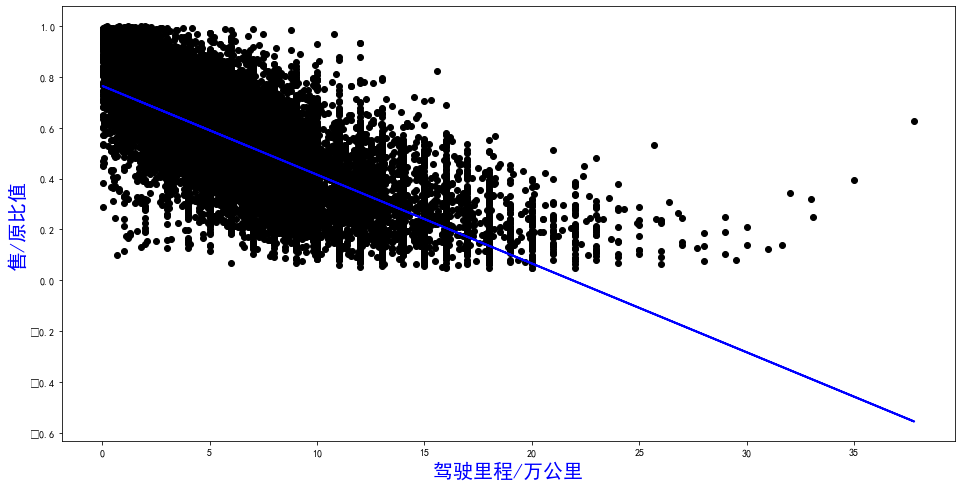

In [64]:
from sklearn.linear_model import LinearRegression
X = data['驾驶行程/万公里'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['驾驶行程/万公里'], data['售/原'], c='black')
plt.plot( data['驾驶行程/万公里'], predictions, c='blue', linewidth=2)
plt.xlabel("驾驶里程/万公里", fontsize= 20, c='blue')
plt.ylabel("售/原比值", fontsize= 20, c='blue')
plt.show()

In [65]:
#  评估模型相关性
#  接下来是检验一个模型表现是否良好，需要查看它的R值和每个系数的p值。
import statsmodels.api as sm
X = data['驾驶行程/万公里']
y = data['售/原']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    售/原   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                 2.904e+04
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:42:41   Log-Likelihood:                 14366.
No. Observations:               25975   AIC:                        -2.873e+04
Df Residuals:                   25973   BIC:                        -2.871e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7646      0.002    465.680      0.0

In [16]:
est2.pvalues

const       0.0
驾驶行程/万公里    0.0
dtype: float64

In [66]:
# 上牌时间之差 用月份表示
from dateutil import rrule
from datetime import datetime
import time
SHP = []
for i in data['上牌时间']:
    SHP.append(datetime.strptime(i, "%Y-%m"))
SHP
time.localtime()
# for i in data['上牌时间']:

#     SHP.append(datetime.datetime.strptime(i, "%Y-%m"))
# time.localdate(time.date()).__sub__(SHP).days

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=11, tm_hour=18, tm_min=43, tm_sec=27, tm_wday=5, tm_yday=102, tm_isdst=0)

In [67]:
# 计算汽车当今月份与上牌时间只差
month = []
for i in SHP:
#     print((time.localtime().tm_year - i.year))
#     print(time.localtime().tm_mon - i.month)
    month.append((time.localtime().tm_year - i.year) * 12 + time.localtime().tm_mon - i.month)
month

[11,
 19,
 136,
 76,
 19,
 9,
 84,
 101,
 37,
 45,
 17,
 39,
 27,
 15,
 15,
 103,
 54,
 93,
 76,
 130,
 27,
 15,
 71,
 46,
 73,
 44,
 48,
 43,
 43,
 32,
 10,
 26,
 78,
 70,
 79,
 39,
 78,
 97,
 32,
 119,
 41,
 37,
 52,
 78,
 123,
 71,
 16,
 60,
 37,
 35,
 15,
 36,
 53,
 61,
 87,
 8,
 67,
 101,
 27,
 25,
 39,
 46,
 32,
 25,
 20,
 13,
 77,
 15,
 80,
 15,
 91,
 10,
 44,
 45,
 63,
 46,
 36,
 36,
 19,
 26,
 72,
 101,
 113,
 38,
 63,
 24,
 35,
 15,
 24,
 29,
 175,
 61,
 38,
 56,
 145,
 134,
 18,
 31,
 139,
 89,
 15,
 60,
 79,
 75,
 43,
 38,
 16,
 65,
 16,
 133,
 32,
 23,
 11,
 19,
 118,
 82,
 103,
 80,
 27,
 73,
 51,
 19,
 23,
 11,
 46,
 77,
 49,
 46,
 17,
 51,
 27,
 15,
 36,
 12,
 21,
 24,
 100,
 145,
 68,
 12,
 26,
 43,
 42,
 27,
 23,
 55,
 41,
 34,
 37,
 28,
 40,
 44,
 41,
 52,
 87,
 37,
 39,
 77,
 4,
 12,
 50,
 31,
 9,
 38,
 122,
 13,
 95,
 26,
 16,
 15,
 22,
 39,
 27,
 79,
 88,
 83,
 21,
 83,
 36,
 20,
 128,
 129,
 16,
 73,
 15,
 33,
 45,
 58,
 24,
 60,
 15,
 67,
 29,
 18,
 39,
 36,
 37

In [69]:
from dateutil import rrule
from datetime import datetime
import time
# days = rrule.rrule(freq = rrule.DAILY,dtstart=time.localtime(time.time()),until=SHP)
# days、

In [70]:

# data = data.drop(index=(data.loc[(data['上牌时间'] !='未上牌')].index))  #  清洗异常数据'[]'
(data['上牌时间'] == '未上牌').value_counts()

False    25975
Name: 上牌时间, dtype: int64

The linear model is: Y = 0.8091 + -0.0045094X


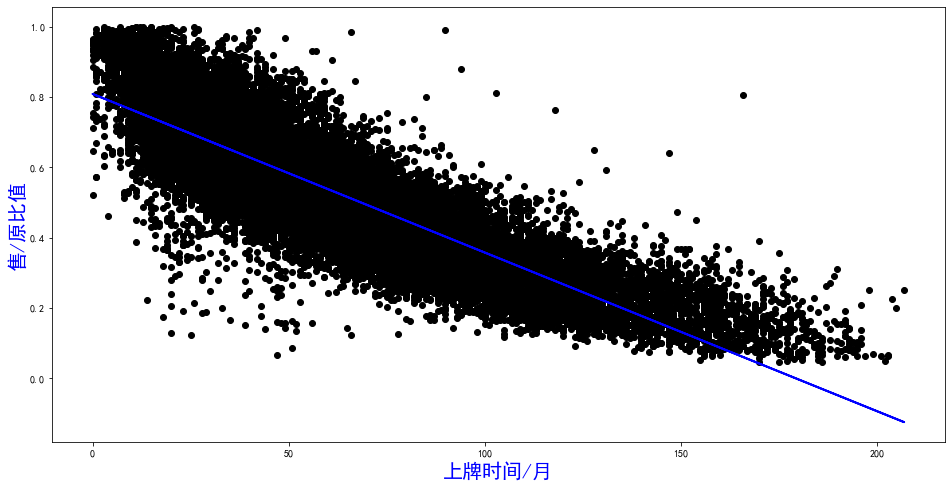

In [94]:
from sklearn.linear_model import LinearRegression
data['month_data'] = month
X = data['month_data'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['month_data'], data['售/原'], c='black')
plt.plot( data['month_data'], predictions, c='blue', linewidth=2)
plt.xlabel("上牌时间/月", fontsize= 20, c='blue')
plt.ylabel("售/原比值", fontsize= 20, c='blue')
plt.show()

In [72]:
#  评估模型相关性
#  接下来是检验一个模型表现是否良好，需要查看它的R值和每个系数的p值。
import statsmodels.api as sm
X = data['month_data']
y = data['售/原']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 
est2.pvalues

                            OLS Regression Results                            
Dep. Variable:                    售/原   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 7.132e+04
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:43:55   Log-Likelihood:                 21771.
No. Observations:               25975   AIC:                        -4.354e+04
Df Residuals:                   25973   BIC:                        -4.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8091      0.001    651.937      0.0

const         0.0
month_data    0.0
dtype: float64

The linear model is: Y = 0.5278 + -6.3143e-06X


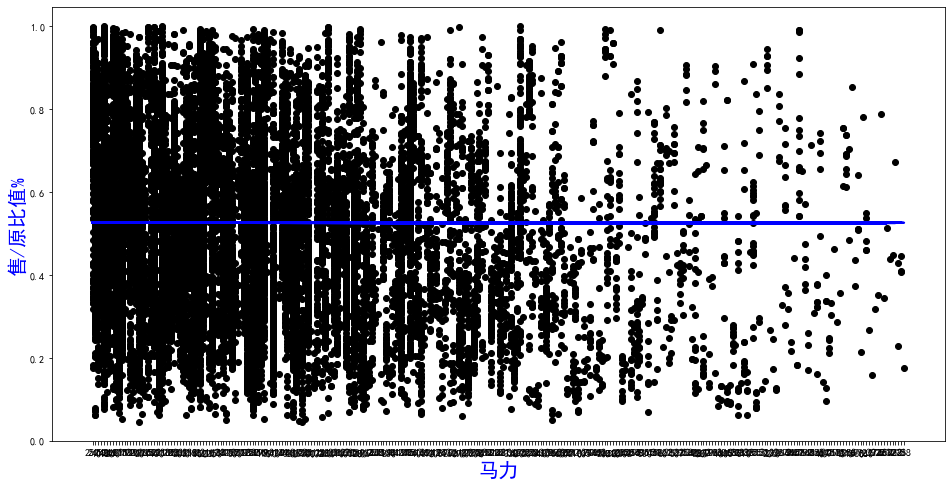

In [98]:
from sklearn.linear_model import LinearRegression
# data['month_data'] = month
X = data['马力'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
# plt.xlim(0,300)
plt.scatter(data['马力'], data['售/原'], c='black')
plt.plot( data['马力'], predictions, c='blue', linewidth=2)
# plt.xaxis.set_major_locator(MultipleLocator(1)) 
plt.xlabel("马力", fontsize= 20, c='blue')
plt.ylabel("售/原比值%", fontsize= 20, c='blue')
plt.show()

In [93]:
#  评估模型相关性
#  接下来是检验一个模型表现是否良好，需要查看它的R值和每个系数的p值。
import statsmodels.api as sm
X = data['马力'].astype(float)
y = data['售/原']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 
est2.pvalues

                            OLS Regression Results                            
Dep. Variable:                    售/原   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1103
Date:                Sat, 11 Apr 2020   Prob (F-statistic):              0.740
Time:                        19:01:09   Log-Likelihood:                 4619.2
No. Observations:               25975   AIC:                            -9234.
Df Residuals:                   25973   BIC:                            -9218.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5278      0.004    143.098      0.0

const    0.000000
马力       0.739772
dtype: float64

In [81]:

data = data.fillna('0')  # 清洗null
# data['马力'] = data['马力'].map(lambda x:x.replace('马', '').replace(' ','').replace("\n", "").replace("\t", "").replace("力", ""))  # 清洗售价
data['马力'].astype(float)

0        252.0
1        245.0
2        107.0
3        148.0
4        184.0
         ...  
26442    184.0
26443    170.0
26444    177.0
26445    117.0
26446    113.0
Name: 马力, Length: 25975, dtype: float64

The linear model is: Y = 0.67227 + -0.070944X


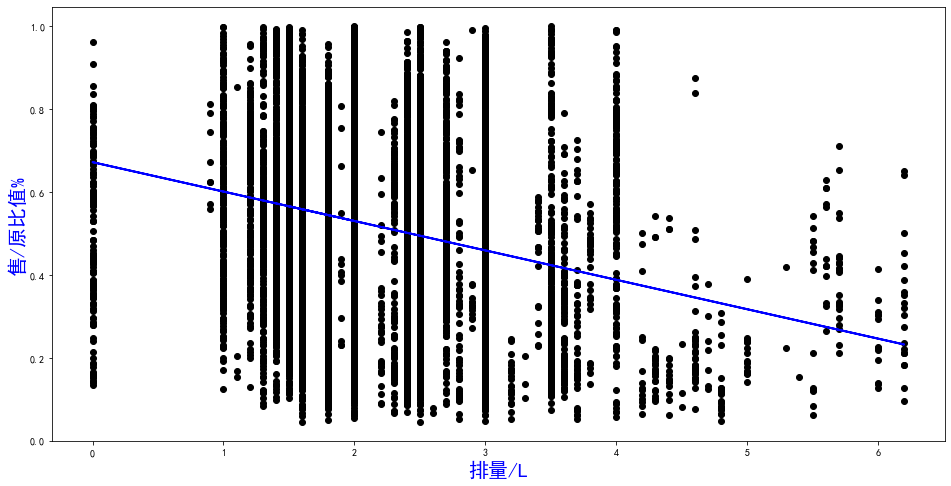

In [90]:
from sklearn.linear_model import LinearRegression
# data['month_data'] = month
X = data['排量/L'].values.reshape(-1,1)
y = data['售/原'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
# 线性回归
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(data['排量/L'], data['售/原'], c='black')
plt.plot( data['排量/L'], predictions, c='blue', linewidth=2)
plt.xlabel("排量/L", fontsize= 20, c='blue')
plt.ylabel("售/原比值%", fontsize= 20, c='blue')
plt.show()

In [91]:
#  评估模型相关性
#  接下来是检验一个模型表现是否良好，需要查看它的R值和每个系数的p值。
import statsmodels.api as sm
X = data['排量/L']
y = data['售/原']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary()) 
est2.pvalues

                            OLS Regression Results                            
Dep. Variable:                    售/原   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1378.
Date:                Sat, 11 Apr 2020   Prob (F-statistic):          5.97e-294
Time:                        18:59:33   Log-Likelihood:                 5290.5
No. Observations:               25975   AIC:                        -1.058e+04
Df Residuals:                   25973   BIC:                        -1.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6723      0.004    163.589      0.0

const     0.000000e+00
排量/L     5.971911e-294
dtype: float64